In [1]:
# 共通で利用するライブラリ
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'

import MeCab

# 10章 アンケート分析を行うための言語処理１０本ノック

ここでは、まちづくりのアンケートを使って分析する。  
主に言語処理を取り扱う。
言語処理特有の処理や、データの持たせ方を学び。

- NLP: Natural Language Processing（自然言語処理）

前提条件

- survey.csv
- 「201901~201904」で集めた顧客満足度アンケート
  - アンケート取得日
  - コメント
  - 満足度（5段階）

### Knock91: データを読み込む

In [2]:
# データの読み込み

survey = pd.read_csv("../support/10章/survey.csv")
print(survey.shape)
display(survey)

(86, 3)


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2
...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2
83,2019/1/9,公園に遊び道具が少なすぎる,1
84,2019/3/9,もっと公園を増やしてほしい,2


In [3]:
# 欠損値の確認

survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
# 欠損値の除去

survey = survey.dropna()
print(survey.shape)
survey.isna().sum()

(84, 3)


datetime        0
comment         0
satisfaction    0
dtype: int64

### Knock92: 不要な文字を除外する

In [5]:
# 特定文字の除去

survey["comment"] = survey["comment"].str.replace("AA", "")
display(survey)

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2
...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2
83,2019/1/9,公園に遊び道具が少なすぎる,1
84,2019/3/9,もっと公園を増やしてほしい,2


In [6]:
# 正規表現による除去1
# 半角()とカッコ内の除去
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "", regex=True)
display(survey)

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2
...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2
83,2019/1/9,公園に遊び道具が少なすぎる,1
84,2019/3/9,もっと公園を増やしてほしい,2


In [7]:
# 正規表現による除去1
# 全角()とカッコ内の除去
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
display(survey)

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2
...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2
83,2019/1/9,公園に遊び道具が少なすぎる,1
84,2019/3/9,もっと公園を増やしてほしい,2


### Knock93: 文字数をカウントしてヒストグラムを表示する

In [8]:
# commentの文字数をカウントする

survey["length"] = survey["comment"].str.len()
display(survey)

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

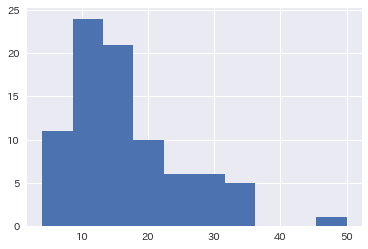

In [9]:
# commentの長さのヒストグラムを描画

plt.hist(survey["length"])

### Knock94: 形態素解析で文章を分割する

- 形態素解析
  - 単語に分割する技術
  - MeCab
  - Janome

In [10]:
# 形態素解析

tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [11]:
print(words)

すもも	スモモ	スモモ	李	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
うち	ウチ	ウチ	内	名詞-普通名詞-副詞可能			0
EOS



In [12]:
# 分割した単語のみをリスト型変数に格納する

# "\n"ごとに分割する
words = tagger.parse(text).splitlines()
words

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t',
 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0',
 'EOS']

In [13]:
print(words)

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t', 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0', 'EOS']


In [14]:
words_arr = []
for i in words:
    if i == "EOS":
        continue
    # "\t"ごとに分割して、最初の文字を変数に格納する
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

### Knock95: 形態素解析で文章から「動詞・名詞」を抽出する

In [15]:
# 動詞・名詞の抽出

text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
for i in words:
    if i == "EOS" or i == "":
        continue
    word_tmp = i.split()[0]
    part = i.split()[4].split("-")[0]
    if not (part in parts):
        continue
    words_arr.append(word_tmp)
words_arr

['すもも', 'もも', 'もも', 'うち']

### Knock96: 形態素解析で抽出した頻出する名詞を確認する

In [16]:
# surveyデータの名詞単語の抽出

all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "":
            continue
        word_tmp = i.split()[0]
        if len(i.split()) > 4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):
                continue
            words_arr.append(word_tmp)
    all_words.extend(words_arr)

print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '

In [17]:
# surveyデータの頻出単語

all_words_df = pd.DataFrame({
    "words": all_words,
    "count": len(all_words) * [1]  # 「1」を代入
})
# "count"を単語ごとに集計する
all_words_df = all_words_df.groupby("words").sum()
# "count"に対して降順で表示する
all_words_df.sort_values("count", ascending=False).head(20)

,count
words,
駅前,7
場所,6
商店,5
公園,5
役所,5
対応,4
駐車,4
信号,3
道,3


### Knock97: 関係のない単語を除去する

- 特定の品詞を数えない

In [18]:
# 除外ワードの除去
stop_words = ["時"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "":
            continue
        word_tmp = i.split()[0]
        if len(i.split()) > 4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):
                continue
            if word_tmp in stop_words:
                continue
            words_arr.append(word_tmp)
    all_words.extend(words_arr)

print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '確認', '街づくり

In [19]:
# 除外ワード除去後の頻出単語

all_words_df = pd.DataFrame({
    "words": all_words,
    "count": len(all_words) * [1]
})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count", ascending=False).head(20)

,count
words,
駅前,7
場所,6
役所,5
商店,5
公園,5
対応,4
駐車,4
子育て,3
道,3


### Knock98: 顧客満足度と頻出単語の関係を見る

In [20]:
# 単語と顧客満足度の抽出

stop_words = ["時"]
parts = ["名詞"]
all_words = []
satisfaction = []

for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "":
            continue
        word_tmp = i.split()[0]
        if word_tmp in stop_words:
            continue
        if len(i.split()) > 4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):
                continue
            words_arr.append(word_tmp)
            satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)

all_words_df = pd.DataFrame({
    "words": all_words,
    "count": len(all_words) * [1],
    "satisfaction": satisfaction
})
display(all_words_df)

,words,count,satisfaction
0,駅前,1,1
1,若者,1,1
2,スポーツ,1,5
3,場所,1,5
4,子育て,1,5
...,...,...,...
231,道具,1,1
232,公園,1,2
233,駅前,1,1
234,駐車,1,1


In [21]:
# 顧客満足度の集計

# "words"ごとに集計する
# "satisfaction"は平均値
# "count"は合計値

words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat(
    [words_count, words_satisfaction],
    axis=1
)
display(words_df)

,count,satisfaction
words,,
BBB,1,2.0000
おじ,1,1.0000
ごみ,1,2.0000
とき,1,5.0000
まち,1,2.0000
...,...,...
駐車,4,1.0000
駐輪,1,1.0000
高速,1,1.0000


In [22]:
# 単語頻出数が「3」以上データに絞る

words_df = words_df.loc[words_df["count"] >= 3]

In [23]:
# 顧客満足度トップ10

words_df.sort_values("satisfaction", ascending=False).head(10)

,count,satisfaction
words,,
子育て,3,4.3333
安心,3,4.3333
スポーツ,3,3.6667
場所,6,3.0000
役所,5,3.0000
支援,3,3.0000
道,3,3.0000
施設,3,2.3333
公園,5,2.2000


In [24]:
# 顧客満足度ワースト10

words_df.sort_values("satisfaction", ascending=True).head(10)

,count,satisfaction
words,,
駐車,4,1.0000
信号,3,1.3333
駅前,7,1.4286
街路,3,1.6667
対応,4,2.0000
災害,3,2.0000
公園,5,2.2000
商店,5,2.2000
施設,3,2.3333


### Knock99: アンケートごとの特徴を表現する

- カウントベースの手法

In [26]:
# アンケート特徴表現の作成

parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []

for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "":
            continue
        word_tmp = i.split()[0]
        if len(i.split()) >= 4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):
                continue
            words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)

display(all_words_df)

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,学校,公園,近く,スーパー,デート,スポット,夜道,ゴミ,処理,楽,映画,街路,追加,観光,道,都内,アクセス,家賃,BBB,渋滞,屋根,雨,喫茶,ジム,利用,料金,ママ,バス,自転,ランニング,運動,企業,駐車,変,おじ,声,事,警察,巡回,強化,消防,安心,災害,時,避難,気,最近,川,氾濫,被害,町,防止,説明,信号,交差,点,ｘｘｘ,事故,活性,活動,行政,後押し,子ども,安全,駐輪,不便,落ち葉,掃除,備蓄,状況,歩道,地域,自治,体,地,他県,ナンバー,車,防犯,数,公共,歩行,老人,子供,設定,急行,路線,春,桜,並木,最高,隣町,ごみ,心配,公害,市長,活気,アンケート,確認,街づくり,反映,姿勢,先月,職員,不正,事件,詳細,役所,担当,愛想,出張,土日,経路,表示,市,ホーム,ページ,電話,対応,路地,街頭,動物,冬場,路面,凍結,自然,野良猫,糞害,対策,相談,とき,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具
0,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [27]:
# アンケート特徴表現の欠損値に「０」を代入

all_words_df = all_words_df.fillna(0)
display(all_words_df)

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,学校,公園,近く,スーパー,デート,スポット,夜道,ゴミ,処理,楽,映画,街路,追加,観光,道,都内,アクセス,家賃,BBB,渋滞,屋根,雨,喫茶,ジム,利用,料金,ママ,バス,自転,ランニング,運動,企業,駐車,変,おじ,声,事,警察,巡回,強化,消防,安心,災害,時,避難,気,最近,川,氾濫,被害,町,防止,説明,信号,交差,点,ｘｘｘ,事故,活性,活動,行政,後押し,子ども,安全,駐輪,不便,落ち葉,掃除,備蓄,状況,歩道,地域,自治,体,地,他県,ナンバー,車,防犯,数,公共,歩行,老人,子供,設定,急行,路線,春,桜,並木,最高,隣町,ごみ,心配,公害,市長,活気,アンケート,確認,街づくり,反映,姿勢,先月,職員,不正,事件,詳細,役所,担当,愛想,出張,土日,経路,表示,市,ホーム,ページ,電話,対応,路地,街頭,動物,冬場,路面,凍結,自然,野良猫,糞害,対策,相談,とき,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具
0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.

### Knock100: 類似アンケートを探す

- 満足度の高かったキーワード「子育て」を含む
  - 「子育て支援が嬉しい」の類似アンケートを探す
- コサイン類似度
  - 文書の類似度の指標
  - 特徴量同士のなす角度のち傘で類似度を表す

In [31]:
survey["comment"]

0                    駅前に若者が集まっている
1                スポーツできる場所があるのが良い
2                       子育て支援が嬉しい
3                         保育園に入れる
4                       駅前商店街が寂しい
                 ...             
81              小学校の校庭が芝生なのでとても良い
82    ホームページからアンケートを投稿できるようにしてほしい
83                  公園に遊び道具が少なすぎる
84                  もっと公園を増やしてほしい
85                  駅前に駐車場が少ない、不便
Name: comment, Length: 84, dtype: object

In [30]:
# 対象アンケートの抽出

print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい
駅前     0.0000
若者     0.0000
スポーツ   0.0000
場所     0.0000
子育て    1.0000
        ...  
サポート   0.0000
校庭     0.0000
芝生     0.0000
投稿     0.0000
道具     0.0000
Name: 2, Length: 161, dtype: float64


In [33]:
# 類似度の計算

cos_sim = []

for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)

all_words_df["cos_sim"] = cos_sim
display(all_words_df.sort_values("cos_sim", ascending=False))

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,学校,公園,近く,スーパー,デート,スポット,夜道,ゴミ,処理,楽,映画,街路,追加,観光,道,都内,アクセス,家賃,BBB,渋滞,屋根,雨,喫茶,ジム,利用,料金,ママ,バス,自転,ランニング,運動,企業,駐車,変,おじ,声,事,警察,巡回,強化,消防,安心,災害,時,避難,気,最近,川,氾濫,被害,町,防止,説明,信号,交差,点,ｘｘｘ,事故,活性,活動,行政,後押し,子ども,安全,駐輪,不便,落ち葉,掃除,備蓄,状況,歩道,地域,自治,体,地,他県,ナンバー,車,防犯,数,公共,歩行,老人,子供,設定,急行,路線,春,桜,並木,最高,隣町,ごみ,心配,公害,市長,活気,アンケート,確認,街づくり,反映,姿勢,先月,職員,不正,事件,詳細,役所,担当,愛想,出張,土日,経路,表示,市,ホーム,ページ,電話,対応,路地,街頭,動物,冬場,路面,凍結,自然,野良猫,糞害,対策,相談,とき,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具,cos_sim
2,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
24,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7071
15,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7071
33,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.000

In [34]:
# 類似文章の出力

print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[33])

子育て支援が嬉しい
子育てがしやすい
子育てしやすい
働くママの支援をもっと増やして欲しい
